<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("2018-2019_Daily_Attendance.csv")
data

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,20190620,230,46,136,48
277149,79X695,20190621,226,53,128,45
277150,79X695,20190624,226,42,130,54
277151,79X695,20190625,226,56,127,43


## Display top 7 rows of the dataframe in your notebook

In [10]:
data.head(7)

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
5,01M015,20180914,173,11,162,0
6,01M015,20180917,173,10,163,0


## Count number of null values (if any) for each column

In [11]:
data.isna().sum()

School DBN    0
Date          0
Enrolled      0
Absent        0
Present       0
Released      0
dtype: int64

dari data rekap absen pada sekolah DBN tidak memiliki nilai null

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   School DBN  277153 non-null  object
 1   Date        277153 non-null  int64 
 2   Enrolled    277153 non-null  int64 
 3   Absent      277153 non-null  int64 
 4   Present     277153 non-null  int64 
 5   Released    277153 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 12.7+ MB


## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

remove kolom dilakukan pada released dan juga enrolled

In [16]:
data_remove_column = data.drop(['Released', 'Enrolled'], axis=1)
data_remove_column.reset_index(drop=True)

,School DBN,Date,Absent,Present
0,01M015,20180905,19,153
1,01M015,20180906,17,154
2,01M015,20180907,14,158
3,01M015,20180912,7,166
4,01M015,20180913,9,164
...,...,...,...,...
277148,79X695,20190620,46,136
277149,79X695,20190621,53,128
277150,79X695,20190624,42,130
277151,79X695,20190625,56,127


## Display the average, median, and standard deviation of each of your numerical columns

In [22]:
numerik_column = ["Enrolled","Absent", "Present", "Released"]
data[numerik_column].describe()

,Enrolled,Absent,Present,Released
count,277153.00000,277153.000000,277153.000000,277153.000000
mean,596.98617,50.503538,544.499403,1.983229
std,482.90966,54.329671,452.970313,35.114511
min,1.00000,0.000000,1.000000,0.000000
25%,329.00000,23.000000,291.000000,0.000000
50%,476.00000,38.000000,430.000000,0.000000
75%,684.00000,59.000000,640.000000,0.000000
max,5955.00000,2151.000000,5847.000000,5904.000000


karena syntax di atas melakukan secara otomatis format statistik mulai dari perhitungan jumlah data, sampai nilai maximal data. Maka, apabila harapan soal HANYA untuk menampilkan mean, median, dan standar deviasi dapat dilakukan dengan cara berikut

In [113]:
mean = pd.DataFrame(data[numerik_column].mean(), columns=['Average'])

In [39]:
std = pd.DataFrame(data[numerik_column].std(), columns=['Standart Deviation'])

In [43]:
med = pd.DataFrame(data[numerik_column].median(), columns=['Median'])

In [114]:
concanted = pd.concat([mean,std, med], axis=1)
concanted

,Average,Standart Deviation,Median
Enrolled,596.986170,482.909660,476.0
Absent,50.503538,54.329671,38.0
Present,544.499403,452.970313,430.0
Released,1.983229,35.114511,0.0


## Plot two of the numerical columns one against the other in a scatter plot

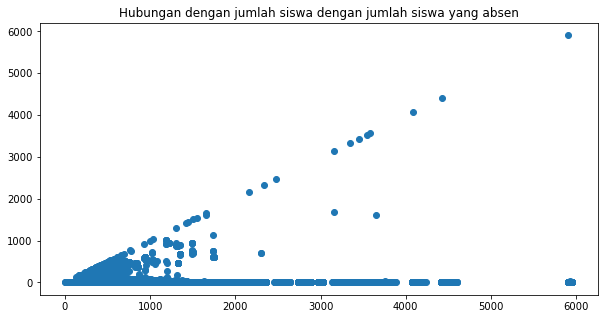

In [55]:
plt.figure(figsize=(10,5))
plt.scatter (data['Enrolled'], data['Released'])
plt.title('Hubungan dengan jumlah siswa dengan jumlah siswa yang absen')
plt.show()

## Plot the data distribution of all your numerical columns in histogram and boxplot

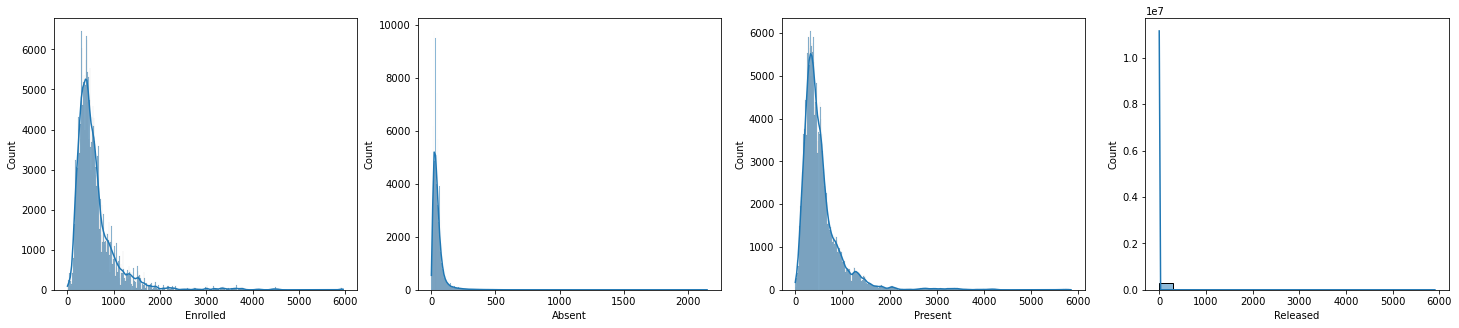

In [78]:
# histogram untuk melihat distribusi data
fig, ax = plt.subplots(1,4, figsize=(25,5))
sns.histplot(x='Enrolled',data = data,kde=True, ax=ax[0])
sns.histplot(x='Absent',data = data,kde=True, ax=ax[1])
sns.histplot(x='Present',data = data,kde=True, ax=ax[2])
sns.histplot(x='Released',data = data,kde=True, ax=ax[3])
plt.show()

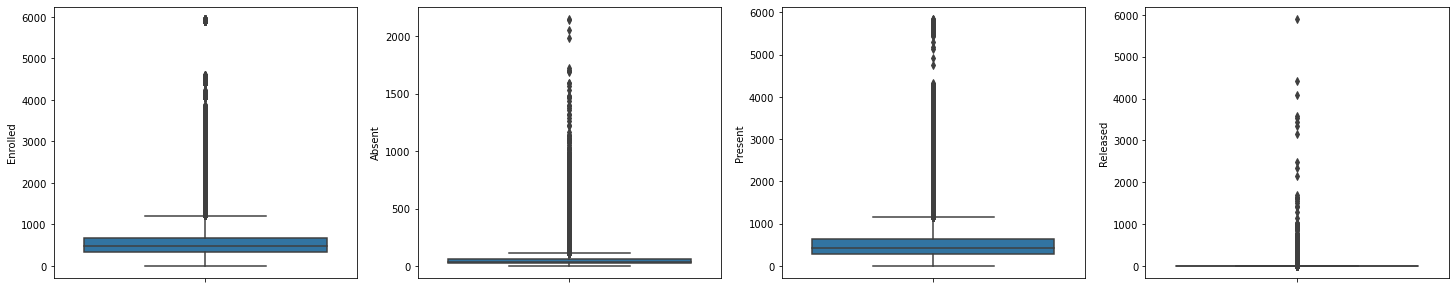

In [79]:
# boxplot diagram
fig, ax = plt.subplots(1,4, figsize=(25,5))
sns.boxplot(y='Enrolled',data = data, ax=ax[0])
sns.boxplot(y='Absent',data = data, ax=ax[1])
sns.boxplot(y='Present',data = data, ax=ax[2])
sns.boxplot(y='Released',data = data, ax=ax[3])
plt.show()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [98]:
data.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0


In [161]:
pangkat = 2
data1 = data.iloc[:, 2:]
data1.columns = ['Raised_Enrolled', 'Raised_Absent', 'Raised_Present', 'Raised_Released']

In [162]:
data1

,Raised_Enrolled,Raised_Absent,Raised_Present,Raised_Released
0,172,19,153,0
1,171,17,154,0
2,172,14,158,0
3,173,7,166,0
4,173,9,164,0
...,...,...,...,...
277148,230,46,136,48
277149,226,53,128,45
277150,226,42,130,54
277151,226,56,127,43


In [163]:
data_raised = pow(data1, pangkat)
data_raised

,Raised_Enrolled,Raised_Absent,Raised_Present,Raised_Released
0,29584,361,23409,0
1,29241,289,23716,0
2,29584,196,24964,0
3,29929,49,27556,0
4,29929,81,26896,0
...,...,...,...,...
277148,52900,2116,18496,2304
277149,51076,2809,16384,2025
277150,51076,1764,16900,2916
277151,51076,3136,16129,1849


In [165]:
data_new = pd.concat([data,data_raised], axis=1)
data_new.reset_index()
data_new

,School DBN,Date,Enrolled,Absent,Present,Released,Raised_Enrolled,Raised_Absent,Raised_Present,Raised_Released
0,01M015,20180905,172,19,153,0,29584,361,23409,0
1,01M015,20180906,171,17,154,0,29241,289,23716,0
2,01M015,20180907,172,14,158,0,29584,196,24964,0
3,01M015,20180912,173,7,166,0,29929,49,27556,0
4,01M015,20180913,173,9,164,0,29929,81,26896,0
...,...,...,...,...,...,...,...,...,...,...
277148,79X695,20190620,230,46,136,48,52900,2116,18496,2304
277149,79X695,20190621,226,53,128,45,51076,2809,16384,2025
277150,79X695,20190624,226,42,130,54,51076,1764,16900,2916
277151,79X695,20190625,226,56,127,43,51076,3136,16129,1849


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [194]:
from zipfile import ZipFile
import requests as req

In [195]:
with req.get('https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip') as rq:
    with open('myfile.zip', 'wb') as file:
        file.write(rq.content)

mohon maaf karena tidak memakai syntax yang dicontohkan, saya mencari syntax lain untuk transfer dari file di html ke local storage

In [196]:
with ZipFile('myfile.zip', 'r') as myzip:
    myzip.extract('201907-citibike-tripdata.csv')

hasil download lalu dilakukan unzip pada file .zip

In [4]:
data_citi = pd.read_csv('201907-citibike-tripdata.csv')
data_citi

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493.0,W 45 St & 6 Ave,40.756800,-73.982912,454.0,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143.0,5 Ave & E 78 St,40.776321,-73.964274,3226.0,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317.0,E 6 St & Avenue B,40.724537,-73.981854,3469.0,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249.0,Harrison St & Hudson St,40.718710,-74.009001,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552.0,W 113 St & Broadway,40.805973,-73.964928,3538.0,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181059,644,2019-07-31 23:59:45.2950,2019-08-01 00:10:29.8640,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,19018,Subscriber,1964,1
2181060,589,2019-07-31 23:59:52.7170,2019-08-01 00:09:42.0870,3285.0,W 87 St & Amsterdam Ave,40.788390,-73.974700,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,15330,Subscriber,1997,1
2181061,1302,2019-07-31 23:59:52.8280,2019-08-01 00:21:35.1090,331.0,Pike St & Monroe St,40.711731,-73.991930,309.0,Murray St & West St,40.714979,-74.013012,39730,Subscriber,1966,2
2181062,353,2019-07-31 23:59:57.1130,2019-08-01 00:05:50.1350,3255.0,8 Ave & W 31 St,40.750585,-73.994685,482.0,W 15 St & 7 Ave,40.739355,-73.999318,30149,Subscriber,1994,1


## Count the number of missing values of each column

In [199]:
data_citi.isna().sum()

tripduration                0
starttime                   0
stoptime                    0
start station id           54
start station name         54
start station latitude      0
start station longitude     0
end station id             54
end station name           54
end station latitude        0
end station longitude       0
bikeid                      0
usertype                    0
birth year                  0
gender                      0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [9]:
age = 2021 - data_citi['birth year']
data_age = pd.DataFrame(age)
data_age.columns = ['Age']
data_age

,Age
0,55
1,25
2,35
3,33
4,24
...,...
2181059,57
2181060,24
2181061,55
2181062,27


In [7]:
category = []
for i, column in data_citi.iterrows():
    if column['gender'] == 0:
        category.append('unknown')
    elif column['gender']== 1:
        category.append('male')
    else:
        category.append('female')

data_citi['Category'] = category

In [10]:
data_citi = pd.concat([data_citi,data_age], axis=1)

In [11]:
data_citi.reset_index()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Category,Age
0,0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493.0,W 45 St & 6 Ave,40.756800,-73.982912,454.0,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1,male,55
1,1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143.0,5 Ave & E 78 St,40.776321,-73.964274,3226.0,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1,male,25
2,2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317.0,E 6 St & Avenue B,40.724537,-73.981854,3469.0,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1,male,35
3,3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249.0,Harrison St & Hudson St,40.718710,-74.009001,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1,male,33
4,4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552.0,W 113 St & Broadway,40.805973,-73.964928,3538.0,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1,male,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181059,2181059,644,2019-07-31 23:59:45.2950,2019-08-01 00:10:29.8640,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,19018,Subscriber,1964,1,male,57
2181060,2181060,589,2019-07-31 23:59:52.7170,2019-08-01 00:09:42.0870,3285.0,W 87 St & Amsterdam Ave,40.788390,-73.974700,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,15330,Subscriber,1997,1,male,24
2181061,2181061,1302,2019-07-31 23:59:52.8280,2019-08-01 00:21:35.1090,331.0,Pike St & Monroe St,40.711731,-73.991930,309.0,Murray St & West St,40.714979,-74.013012,39730,Subscriber,1966,2,female,55
2181062,2181062,353,2019-07-31 23:59:57.1130,2019-08-01 00:05:50.1350,3255.0,8 Ave & W 31 St,40.750585,-73.994685,482.0,W 15 St & 7 Ave,40.739355,-73.999318,30149,Subscriber,1994,1,male,27


C:\Users\naufa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\naufa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\naufa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


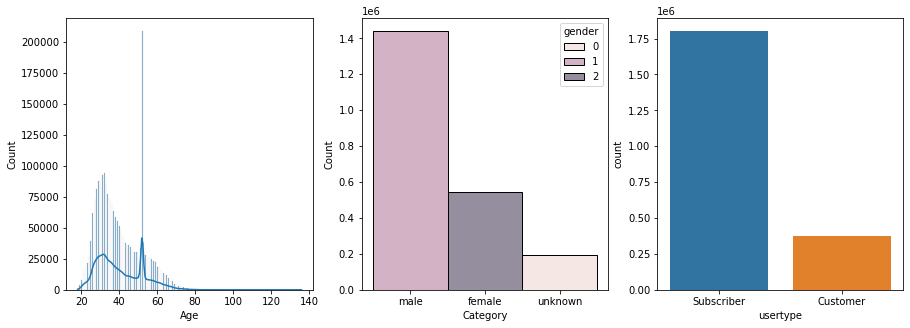

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.histplot(x='Age',data = data_citi,kde=True, ax=ax[0])
sns.histplot(x='Category',data = data_citi,hue='gender',kde=True, ax=ax[1])
sns.countplot(x='usertype', data=data_citi, ax=ax[2])
plt.show()

## What is the average number of trips per day?

In [242]:
data_citi['starttime'] = pd.to_datetime(data_citi['starttime']).dt.date
data_citi['starttime']

0          2019-07-01
1          2019-07-01
2          2019-07-01
3          2019-07-01
4          2019-07-01
              ...    
2181059    2019-07-31
2181060    2019-07-31
2181061    2019-07-31
2181062    2019-07-31
2181063    2019-07-31
Name: starttime, Length: 2181064, dtype: object

In [276]:
pv = pd.pivot_table(data_citi, index="starttime", values=['gender'], aggfunc=np.sum)
pv.columns = ['Jumlah']
pv

,Jumlah
starttime,
2019-07-01,91389
2019-07-02,91828
2019-07-03,86327
2019-07-04,57536
2019-07-05,65084
2019-07-06,56033
2019-07-07,69019
2019-07-08,79644
2019-07-09,99154


In [272]:
# rata-rata per hari
pv_mean = pv.mean()
pv_mean

Jumlah    81579.451613
dtype: float64

## What is the average trip duration?

In [249]:
trip = data_citi['tripduration']
trip_average = pd.DataFrame(trip).mean()
trip_average

tripduration    1035.359728
dtype: float64

## What days of the week are most rides taken on?
Process the data and plot your answer

In [283]:
pv.sort_values(by='Jumlah', ascending=False)

,Jumlah
starttime,
2019-07-24,103527
2019-07-25,101368
2019-07-16,100117
2019-07-10,99687
2019-07-09,99154
2019-07-26,95996
2019-07-15,95484
2019-07-30,95461
2019-07-12,94643


hari terbanyak ditemukan pada tanggal 24 Juli 2019

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [285]:
data3 = data_citi.sort_values(by='tripduration',ascending=False)
data3

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age
101402,2621244,2019-07-02,2019-08-01 18:50:48.3560,3232.0,Bond St & Fulton St,40.689622,-73.983043,157.0,Henry St & Atlantic Ave,40.690893,-73.996123,33922,Customer,1969,0,52
20259,2593675,2019-07-01,2019-07-31 10:54:24.1920,480.0,W 53 St & 10 Ave,40.766697,-73.990617,3720.0,Wyckoff St & Bond St,40.684617,-73.987213,25073,Customer,1989,1,32
265699,2504503,2019-07-04,2019-08-02 17:35:03.6480,3440.0,Fulton St & Adams St,40.692418,-73.989495,3423.0,West Drive & Prospect Park West,40.661063,-73.979453,35345,Customer,1969,0,52
231022,2481042,2019-07-04,2019-08-01 17:36:50.5970,436.0,Hancock St & Bedford Ave,40.682166,-73.953990,3046.0,Marcus Garvey Blvd & Macon St,40.682601,-73.938037,39621,Customer,1969,0,52
274870,2410359,2019-07-04,2019-08-01 18:10:44.2780,3576.0,Park Pl & Vanderbilt Ave,40.676700,-73.969024,3179.0,Park Ave & Marcus Garvey Blvd,40.698617,-73.941342,28081,Customer,1988,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652606,61,2019-07-25,2019-07-25 07:23:04.8410,3116.0,Huron St & Franklin St,40.732660,-73.958260,3469.0,India St & West St,40.731814,-73.959950,32532,Subscriber,1985,2,36
292269,61,2019-07-05,2019-07-05 09:31:26.6890,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,19808,Subscriber,1982,1,39
1287713,61,2019-07-19,2019-07-19 10:31:45.1960,3137.0,5 Ave & E 73 St,40.772828,-73.966853,3137.0,5 Ave & E 73 St,40.772828,-73.966853,16163,Customer,1976,2,45
553466,61,2019-07-09,2019-07-09 12:54:36.4930,3235.0,E 41 St & Madison Ave,40.752165,-73.979922,517.0,Pershing Square South,40.751581,-73.977910,39563,Subscriber,1975,1,46


pengendaraan terlama terjadi pada tanggal 2 Juli 2019 sebanyak 2.621.244. tidak diketahui angka dari durasi trip dalam satuan apa (karena tidak ada dictionarynya)

## Is there correlation between age and trip duration?

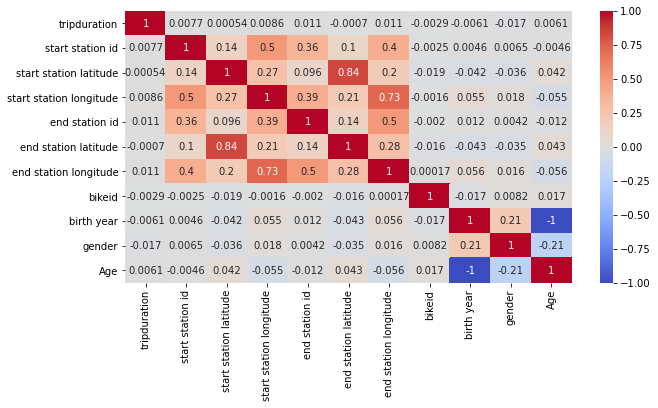

In [286]:
plt.figure(figsize=(10,5))
sns.heatmap(data_citi.corr(),annot=True,cmap='coolwarm')
plt.show()

dapat dilihat bahwa antara age dan trip duration tidak memiliki kecenderungan korelasi (baik positif maupun negatif), sehingga dapat dikatakan antara umur dengan durasi perjalanan memiliki korelasi yang lemah positif atau tidak berkorelasi karena mendekati 0

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [308]:
stasiun_berangkat = pd.pivot_table(data_citi, index="start station name", values=['gender'], aggfunc=np.sum)
stasiun_berangkat.columns = ['Jumlah']
stasiun_berangkat.sort_values(by='Jumlah', ascending=False)
stasiun_berangkat.head(10)

,Jumlah
start station name,
1 Ave & E 110 St,1966
1 Ave & E 16 St,10378
1 Ave & E 18 St,7313
1 Ave & E 30 St,5348
1 Ave & E 44 St,4634
1 Ave & E 62 St,5828
1 Ave & E 68 St,8041
1 Ave & E 78 St,6127
1 Ave & E 94 St,2126


In [307]:
stasiun_berhenti = pd.pivot_table(data_citi, index="end station name", values=['gender'], aggfunc=np.sum)
stasiun_berhenti.columns = ['Jumlah']
stasiun_berhenti.sort_values(by='Jumlah', ascending=False)
stasiun_berhenti.head(10)

,Jumlah
end station name,
1 Ave & E 110 St,2056
1 Ave & E 16 St,10276
1 Ave & E 18 St,7338
1 Ave & E 30 St,5344
1 Ave & E 44 St,4656
1 Ave & E 62 St,5767
1 Ave & E 68 St,8056
1 Ave & E 78 St,6021
1 Ave & E 94 St,2140


Stasiun 1 Ave & E 110 St merupakan stasiun paling favorit sebagai tempat mulai dan pemberhentian perjalanan. Kemudian list di atas merupakan list 10 statiun favorit sebagai tempat berangkat dan berhenti

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



Umur yang melakukan perjalanan banyak pada umur 20-30 tahun

H0 : jumlah konsumen selain umur 20-30 tahun memiliki jumlah yang lebih sedikit dibandingkan jumlah umur 20-30

## Work with your dataset and show your findings to help answer your question

In [310]:
umur = data_citi.sort_values(by='Age', ascending=True)
umur['Age']

1463396     18
990068      18
1459959     18
952021      18
29035       18
          ... 
1927977    136
1011548    136
1410447    136
1828157    136
1397694    136
Name: Age, Length: 2181064, dtype: int64

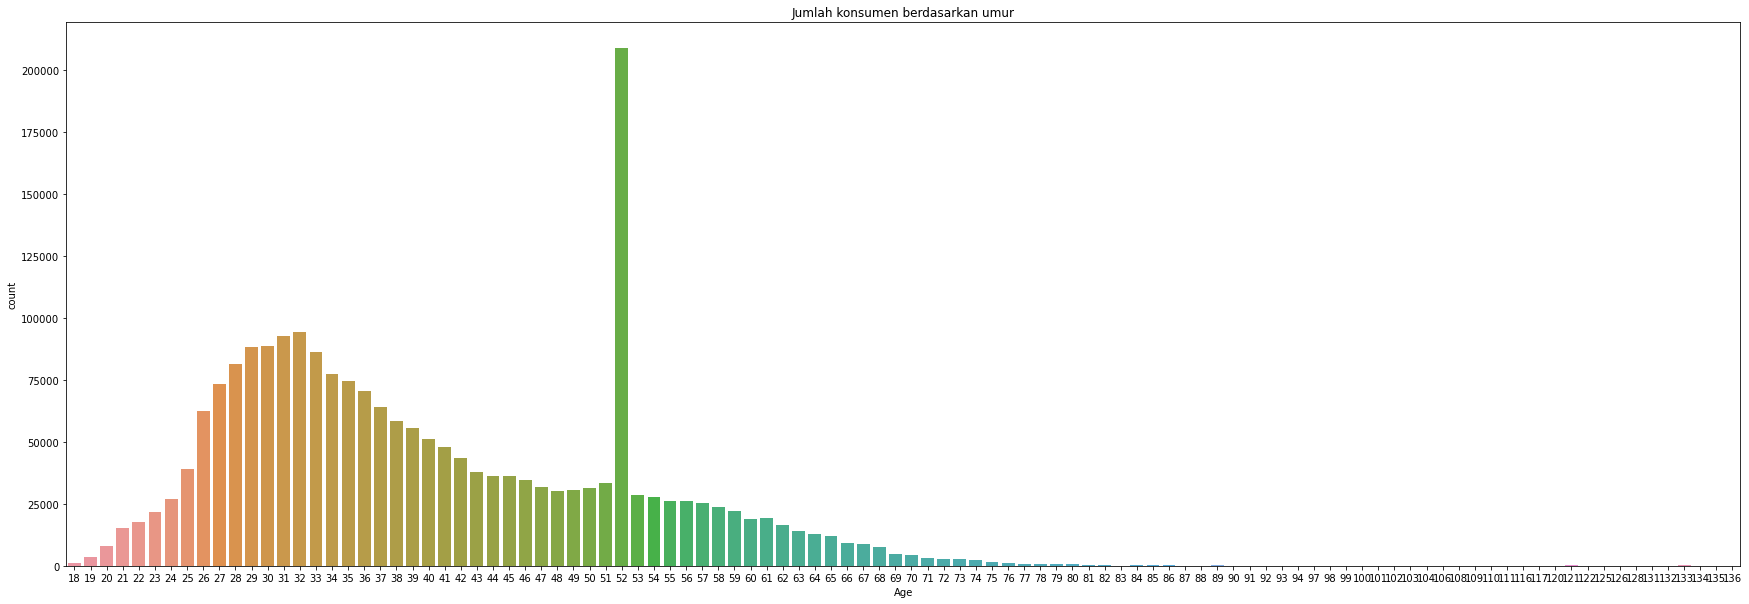

In [313]:
plt.figure(figsize=(30,10))
sns.countplot(x=umur['Age'])
plt.title('Jumlah konsumen berdasarkan umur')
plt.show()

dari visual di atas dapat dilihat bahwa terdapat kemugnkinan hipotesa ditolak karena pada umur 52 menyumbang jumlah terbesar pada pemakaian jasa ini. Namun, akan lebih dibuktikan dengan hitungan di bawah ini.

In [319]:
umur1 = pd.DataFrame(umur['Age'])
umur1

,Age
1463396,18
990068,18
1459959,18
952021,18
29035,18
...,...
1927977,136
1011548,136
1410447,136
1828157,136


In [323]:
exp_filter = umur1.loc[(umur1['Age'] >= 20) & (umur1['Age'] <= 30)]
exp_filter.sum()

Age    14081470
dtype: int64

In [326]:
exp_filter1 = umur1.loc[(umur1['Age'] < 20)]
exp_filter1

,Age
1463396,18
990068,18
1459959,18
952021,18
29035,18
...,...
251815,19
1403829,19
242095,19
2093906,19


In [328]:
exp_filter3 = umur1.loc[(umur1['Age'] > 30)]
exp_filter3

,Age
1753143,31
448188,31
332974,31
1030454,31
1362801,31
...,...
1927977,136
1011548,136
1410447,136
1828157,136


In [332]:
exp_filter4 = pd.concat([exp_filter1,exp_filter3], axis=0)
exp_filter4.sum()

Age    73931101
dtype: int64

## Kesimpulan

Jumlah konsumen pada rentang 20-30 tahun sebesar 14.081.470 konsumen sedangkan pada umur di luar rentang tersebut memiliki jumlah sebesar 73.931.101. Sehingga hipotesa ditolak dan H1 diterima yaitu konsumen di luar rentang umur 20-30 tahun memiliki jumlah lebih besar

## Note

Untuk data ini tidak bisa dipush ke git karena ukurannya sangat besar, yaitu 400+ ribu mb. Sehingga saya push zip filenya saja. Terima kasih.

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```